<a href="https://colab.research.google.com/github/keijiyo/Study_AI_recipe_book/blob/main/AI_Recipe_Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 5　調査データ×コレスポンデンス分析モデル

##introduction

調査データを要約したい

調査データ項目が多い場合は、うまく全体像を把握するためにはデータを要約する必要がある

##レシピ5.1　調査データの分析設計

mcaはコレスポンディング分析用パッケージ

In [1]:
!pip install mca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=3a8e890867028d69e54a10540f3ce7ef65eeb68929f50a0e891342f89b88c233
  Stored in directory: /root/.cache/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca


データをダウンロード

In [2]:
!mkdir ./autos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data -P ./autos

--2022-08-15 04:05:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [application/x-httpd-php]
Saving to: ‘./autos/imports-85.data’

imports-85.data     100%[===================>]  25.33K  --.-KB/s    in 0.1s    

2022-08-15 04:05:09 (196 KB/s) - ‘./autos/imports-85.data’ saved [25936/25936]



パッケージをインポート

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mca

ファイル読込

ヘッダー行がないことを確認

In [4]:
df_autos = pd.read_csv('./autos/imports-85.data',  delimiter=',')

df_autos.sample(n=5, random_state=777)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
195,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
151,1,74,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488
162,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8058
137,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118


header=None指定で読込

In [6]:
df_autos = pd.read_csv('./autos/imports-85.data',  delimiter=',', header=None,
                       names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
                              'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
                              'length', 'width','height', 'curb-weight', 'engine-type',
                              'num-of', 'engine-size', 'fuel-system', 'bore', 'stroke',
                              'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
                              'price'])

df_autos.sample(n=5, random_state=777)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529
75,1,?,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988


##レシピ5.2　調査データの準備

データ型の確認

In [7]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of             205 non-null    object 
 16  engine-size        205 non

In [8]:
display(df_autos.select_dtypes(include=[int, float]).describe()) # 数値カラムの中身確認
display(df_autos.select_dtypes(include=object).describe()) # object型カラムの中身確認

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


「?」をNaNに置き換えてdropnaする

In [9]:
df_autos_filtered=df_autos.replace('?', np.nan).dropna()
df_autos_filtered[['normalized-losses', 'horsepower', 'peak-rpm', 'price']]=df_autos_filtered[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].astype(int)
df_autos_filtered[['bore', 'stroke']]=df_autos_filtered[['bore', 'stroke']].astype(float)
df_autos_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of             159 non-null    object 
 16  engine-size        159 non

「?」のindexを指定してdropする（上の別解）

In [10]:
drop_index = df_autos.index[
                      (df_autos['normalized-losses']=='?') |
                      (df_autos['make']=='?') |
                      (df_autos['fuel-type']=='?') |
                      (df_autos['aspiration']=='?') |
                      (df_autos['num-of-doors']=='?') |
                      (df_autos['body-style']=='?') |
                      (df_autos['drive-wheels']=='?') |
                      (df_autos['engine-location']=='?') |
                      (df_autos['engine-type']=='?') |
                      (df_autos['num-of']=='?') |
                      (df_autos['fuel-system']=='?') |
                      (df_autos['bore']=='?') |
                      (df_autos['stroke']=='?') |
                      (df_autos['horsepower']=='?') |
                      (df_autos['peak-rpm']=='?') |
                      (df_autos['price']=='?')]
df_autos_filtered=df_autos.drop(drop_index)
df_autos_filtered[['normalized-losses', 'horsepower', 'peak-rpm', 'price']]=df_autos_filtered[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].astype(int)
df_autos_filtered[['bore', 'stroke']]=df_autos_filtered[['bore', 'stroke']].astype(float)
df_autos_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of             159 non-null    object 
 16  engine-size        159 non

同じく「?」のindexを指定してdropする方法だが、for文を使っている（上の別解）

In [ ]:
drop_index=np.array([])
for c in df_autos.columns:
    drop_index = np.append(drop_index, df_autos.index[df_autos[c]=='?'])
df_autos_filtered=df_autos.drop(drop_index)
df_autos_filtered[['normalized-losses', 'horsepower', 'peak-rpm', 'price']]=df_autos_filtered[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].astype(int)
df_autos_filtered[['bore', 'stroke']]=df_autos_filtered[['bore', 'stroke']].astype(float)
df_autos_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of             159 non-null    object 
 16  engine-size        159 non

サンプル抽出し確認

In [11]:
df_autos_filtered.sample(n=5, random_state=777)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
32,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
29,3,145,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964
146,0,89,subaru,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463


数値変数について確認

In [12]:
df_autos.select_dtypes(include=[int, float]).describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


数値を4段階のカテゴリに変更  
pandasのDataFrameをfor文で[列][行]を指定して処理

In [13]:
df_autos_numcol=df_autos_filtered.select_dtypes(include=[int, float]).describe()

for c in df_autos_numcol.columns:
    df_autos_filtered[c]=df_autos_filtered[c].map(lambda x:
                                                  0 if x>=df_autos_numcol[c]['min'] and x<df_autos_numcol[c]['25%']
                                                  else 1 if x>=df_autos_numcol[c]['25%'] and x<df_autos_numcol[c]['50%']
                                                  else 2 if x>=df_autos_numcol[c]['50%'] and x<df_autos_numcol[c]['75%']
                                                  else 3 if x>=df_autos_numcol[c]['75%'] and x<=df_autos_numcol[c]['max']
                                                  else None)
df_autos_filtered.sample(n=5, random_state=777)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
187,3,1,volkswagen,diesel,turbo,four,sedan,fwd,front,2,...,1,idi,0,2,3,0,0,3,3,2
32,2,1,honda,gas,std,two,hatchback,fwd,front,0,...,0,1bbl,0,0,3,0,3,3,3,0
175,0,0,toyota,gas,std,four,hatchback,fwd,front,3,...,2,mpfi,2,3,1,2,0,2,2,2
29,3,2,dodge,gas,turbo,two,hatchback,fwd,front,1,...,3,mfi,3,3,0,3,1,0,0,2
146,1,0,subaru,gas,std,four,wagon,fwd,front,2,...,1,2bbl,3,0,2,1,1,2,2,1


変換内容を確認

In [14]:
df_autos_filtered.select_dtypes(include=[int, float])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,3,3,2,2,2,2,1,1,1,2,3,2,3,1,1,2
4,3,3,2,2,2,2,3,3,1,2,0,3,3,0,0,3
6,2,3,3,3,3,3,3,3,1,2,0,2,3,0,0,3
8,2,3,3,3,3,3,3,2,1,2,0,3,3,0,0,3
10,3,3,3,2,1,2,2,1,2,0,1,2,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,3,3,3,3,3,3,3,1,3,3,2,1,1,3
201,0,1,3,3,3,3,3,3,3,1,1,3,2,0,0,3
202,0,1,3,3,3,3,3,3,3,0,1,3,3,0,0,3
203,0,1,3,3,3,3,3,3,0,2,3,2,1,2,0,3


すべてobject型に変更

In [15]:
df_autos_filtered=df_autos_filtered.astype(object)
df_autos_filtered.info()
df_autos_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          159 non-null    object
 1   normalized-losses  159 non-null    object
 2   make               159 non-null    object
 3   fuel-type          159 non-null    object
 4   aspiration         159 non-null    object
 5   num-of-doors       159 non-null    object
 6   body-style         159 non-null    object
 7   drive-wheels       159 non-null    object
 8   engine-location    159 non-null    object
 9   wheel-base         159 non-null    object
 10  length             159 non-null    object
 11  width              159 non-null    object
 12  height             159 non-null    object
 13  curb-weight        159 non-null    object
 14  engine-type        159 non-null    object
 15  num-of             159 non-null    object
 16  engine-size        159 non-null    object
 1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159
unique,4,4,18,2,2,2,5,3,1,4,...,4,6,4,4,4,4,4,4,4,4
top,1,3,toyota,gas,std,four,sedan,fwd,front,1,...,1,mpfi,1,2,2,3,1,3,3,2
freq,48,42,31,144,132,95,79,105,159,47,...,46,64,43,42,60,44,54,44,44,40


##レシピ5.3　グランドトータル集計とクロス集計

グランドトータル集計（単純集計）

In [16]:
cols=list(df_autos_filtered.columns)
for c in cols:
    display(pd.DataFrame(df_autos_filtered.value_counts(c).sort_index()))

,0
symboling,
0,23
1,48
2,46
3,42


,0
normalized-losses,
0,39
1,39
2,39
3,42


,0
make,
audi,4
bmw,4
chevrolet,3
dodge,8
honda,13
jaguar,1
mazda,11
mercedes-benz,5
mitsubishi,10


,0
fuel-type,
diesel,15
gas,144


,0
aspiration,
std,132
turbo,27


,0
num-of-doors,
four,95
two,64


,0
body-style,
convertible,2
hardtop,5
hatchback,56
sedan,79
wagon,17


,0
drive-wheels,
4wd,8
fwd,105
rwd,46


,0
engine-location,
front,159


,0
wheel-base,
0,31
1,47
2,41
3,40


,0
length,
0,40
1,39
2,36
3,44


,0
width,
0,38
1,36
2,33
3,52


,0
height,
0,40
1,34
2,38
3,47


,0
curb-weight,
0,40
1,39
2,40
3,40


,0
engine-type,
dohc,8
l,8
ohc,123
ohcf,12
ohcv,8


,0
num-of,
eight,1
five,7
four,136
six,14
three,1


,0
engine-size,
0,32
1,46
2,41
3,40


,0
fuel-system,
1bbl,11
2bbl,63
idi,15
mfi,1
mpfi,64
spdi,5


,0
bore,
0,35
1,43
2,41
3,40


,0
stroke,
0,40
1,35
2,42
3,42


,0
compression-ratio,
0,35
1,10
2,60
3,54


,0
horsepower,
0,32
1,44
2,39
3,44


,0
peak-rpm,
0,22
1,54
2,38
3,45


,0
city-mpg,
0,38
1,33
2,44
3,44


,0
highway-mpg,
0,35
1,39
2,41
3,44


,0
price,
0,40
1,39
2,40
3,40


for文で使った変数cはfor文の外からも参照できるというスコープを確認するセルだろうか。

In [17]:
pd.DataFrame(df_autos_filtered.value_counts(c).sort_index())

,0
price,
0,40
1,39
2,40
3,40


わかりやすいように棒グラフでで可視化

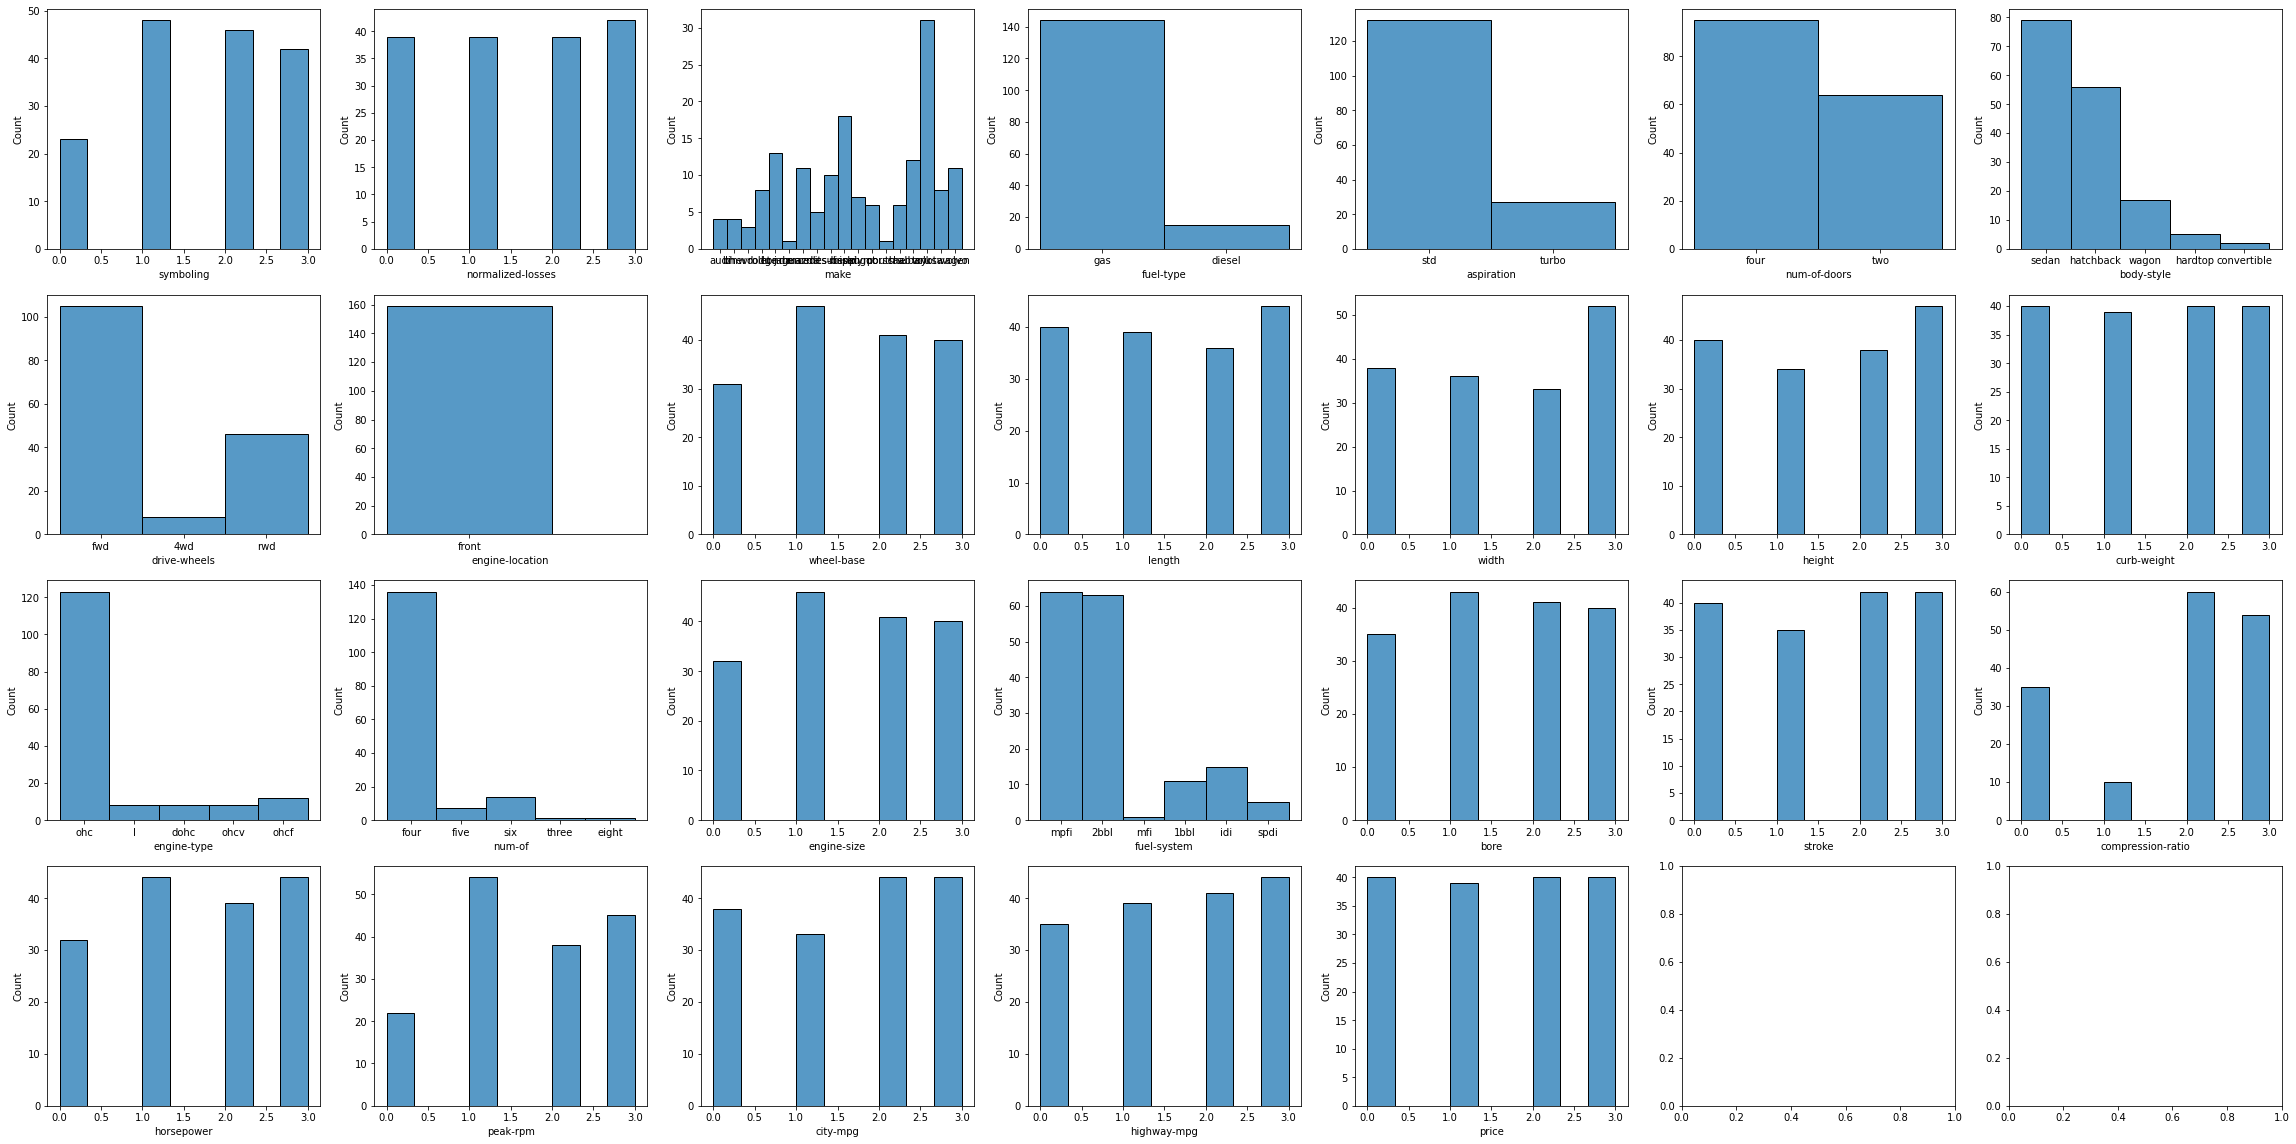

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

i=4
j=len(cols)//4+1
fig, axes = plt.subplots(nrows=i, ncols=j, figsize=(32, 16))

for n, c in enumerate(cols):
    ax=axes[n//j, n%j]
    if n <= len(cols)-1:
        sns.histplot(data=df_autos_filtered[c], ax=ax)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

make列と各列のクロス集計表

In [19]:
cols=list(df_autos_filtered.columns)
cross_list={}
for n, c in enumerate(cols):
    if c != 'make':
        df_cross=pd.crosstab(df_autos_filtered[c], columns=df_autos_filtered['make'])
        cross_list[c]=df_cross
        display(df_cross)

make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
symboling,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,3,1,0,0,1,0,0,0,6,0,11
1,0,3,1,0,7,1,4,1,0,5,7,0,0,0,9,10,0,0
2,2,0,1,6,4,0,7,0,4,10,0,5,0,0,0,7,0,0
3,2,1,1,1,2,0,0,1,5,3,0,0,1,6,3,8,8,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
normalized-losses,,,,,,,,,,,,,,,,,,
0,0,0,1,0,4,0,0,4,0,0,0,1,0,0,7,19,0,3
1,0,0,1,1,7,0,3,0,0,6,0,0,0,3,5,0,5,8
2,0,0,1,4,2,1,8,1,4,8,0,2,0,0,0,6,2,0
3,4,4,0,3,0,0,0,0,6,4,7,3,1,3,0,6,1,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
fuel-type,,,,,,,,,,,,,,,,,,
diesel,0,0,0,0,0,0,0,4,0,1,3,0,0,0,0,3,3,1
gas,4,4,3,8,13,1,11,1,10,17,4,6,1,6,12,28,5,10


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
aspiration,,,,,,,,,,,,,,,,,,
std,3,4,3,6,13,1,11,1,7,17,3,5,1,4,10,30,7,6
turbo,1,0,0,2,0,0,0,4,3,1,4,1,0,2,2,1,1,5


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
num-of-doors,,,,,,,,,,,,,,,,,,
four,4,2,1,4,5,1,6,3,4,9,7,4,0,3,9,17,5,11
two,0,2,2,4,8,0,5,2,6,9,0,2,1,3,3,14,3,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
body-style,,,,,,,,,,,,,,,,,,
convertible,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
hardtop,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0
hatchback,0,0,2,5,7,0,6,0,6,5,0,3,1,3,3,14,1,0
sedan,4,4,1,2,5,1,5,2,4,9,7,2,0,3,5,10,7,8
wagon,0,0,0,1,1,0,0,1,0,3,0,1,0,0,4,3,0,3


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
drive-wheels,,,,,,,,,,,,,,,,,,
4wd,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,0
fwd,3,0,3,8,13,0,10,0,10,15,0,6,0,6,7,16,8,0
rwd,0,4,0,0,0,1,1,5,0,3,7,0,1,0,0,13,0,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
engine-location,,,,,,,,,,,,,,,,,,
front,4,4,3,8,13,1,11,5,10,18,7,6,1,6,12,31,8,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
wheel-base,,,,,,,,,,,,,,,,,,
0,0,0,1,6,5,0,5,0,4,2,0,5,0,0,3,0,0,0
1,0,0,2,1,8,0,0,1,6,10,0,0,1,0,0,17,1,0
2,2,0,0,0,0,0,5,0,0,6,0,0,0,6,9,6,7,0
3,2,4,0,1,0,1,1,4,0,0,7,1,0,0,0,8,0,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
length,,,,,,,,,,,,,,,,,,
0,0,0,3,6,7,0,3,0,4,8,0,3,0,0,3,3,0,0
1,0,0,0,0,3,0,2,0,0,4,0,2,1,0,5,14,8,0
2,2,4,0,2,3,0,1,0,6,2,0,1,0,0,4,11,0,0
3,2,0,0,0,0,1,5,5,0,4,7,0,0,6,0,3,0,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
width,,,,,,,,,,,,,,,,,,
0,0,0,3,6,4,0,0,0,1,10,0,5,0,0,3,6,0,0
1,0,4,0,1,8,0,5,0,3,2,0,1,0,0,0,11,1,0
2,2,0,0,1,1,0,1,0,6,0,0,0,0,0,9,6,7,0
3,2,0,0,0,0,1,5,5,0,6,7,0,1,6,0,8,0,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
height,,,,,,,,,,,,,,,,,,
0,0,0,2,7,3,0,0,1,10,3,0,5,1,0,0,7,1,0
1,0,0,1,0,5,1,2,0,0,4,0,0,0,0,7,14,0,0
2,2,4,0,0,4,0,6,1,0,10,0,0,0,0,4,7,0,0
3,2,0,0,1,1,0,3,3,0,1,7,1,0,6,1,3,7,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
curb-weight,,,,,,,,,,,,,,,,,,
0,0,0,3,5,7,0,5,0,3,10,0,3,0,0,1,3,0,0
1,1,0,0,1,4,0,0,0,2,2,0,2,0,0,5,14,8,0
2,0,4,0,1,2,0,6,0,5,0,0,1,1,5,6,9,0,0
3,3,0,0,1,0,1,0,5,0,6,7,0,0,1,0,5,0,11


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
engine-type,,,,,,,,,,,,,,,,,,
dohc,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,5,0,0
l,0,0,1,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
ohc,4,4,2,8,13,0,11,4,10,12,0,6,1,4,0,26,8,10
ohcf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0
ohcv,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0,1


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
num-of,,,,,,,,,,,,,,,,,,
eight,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
five,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
four,1,2,2,8,13,0,11,0,10,12,7,6,1,6,12,28,8,9
six,0,2,0,0,0,1,0,0,0,6,0,0,0,0,0,3,0,2
three,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
engine-size,,,,,,,,,,,,,,,,,,
0,0,0,3,5,7,0,5,0,3,0,0,3,0,0,0,6,0,0
1,1,2,0,1,0,0,0,0,1,10,0,2,0,0,12,9,8,0
2,1,0,0,1,6,0,5,0,6,2,4,1,0,6,0,7,0,2
3,2,2,0,1,0,1,1,5,0,6,3,0,1,0,0,9,0,9


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
fuel-system,,,,,,,,,,,,,,,,,,
1bbl,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0
2bbl,0,0,3,6,1,0,10,0,6,11,0,5,0,0,8,13,0,0
idi,0,0,0,0,0,0,0,4,0,1,3,0,0,0,0,3,3,1
mfi,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mpfi,4,4,0,1,1,1,1,1,0,6,4,0,1,6,4,15,5,10
spdi,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
bore,,,,,,,,,,,,,,,,,,
0,0,0,3,6,7,0,4,0,4,1,0,5,0,1,0,0,3,1
1,4,0,0,0,6,0,1,0,3,9,0,0,0,0,0,15,5,0
2,0,4,0,1,0,0,5,1,3,8,3,1,0,5,0,10,0,0
3,0,0,0,1,0,1,1,4,0,0,4,0,1,0,12,6,0,10


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
stroke,,,,,,,,,,,,,,,,,,
0,0,2,1,0,1,0,0,1,0,0,1,0,0,6,12,15,0,1
1,0,2,2,5,0,0,6,0,3,0,3,4,1,0,0,0,0,9
2,4,0,0,1,0,0,5,0,1,15,0,1,0,0,0,6,8,1
3,0,0,0,2,12,1,0,4,6,3,3,1,0,0,0,10,0,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
compression-ratio,,,,,,,,,,,,,,,,,,
0,3,0,0,3,0,1,6,1,7,3,4,2,0,0,2,0,1,2
1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,2
2,0,2,0,0,11,0,5,0,0,5,0,0,0,6,6,22,3,0
3,1,0,3,5,2,0,0,4,3,10,3,4,1,0,2,5,4,7


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
horsepower,,,,,,,,,,,,,,,,,,
0,0,0,1,5,2,0,5,0,3,1,0,4,0,0,0,8,3,0
1,0,0,2,0,9,0,5,0,0,9,0,0,0,0,8,8,3,0
2,2,2,0,2,2,0,0,0,4,2,6,2,0,4,4,6,2,1
3,2,2,0,1,0,1,1,5,3,6,1,0,1,2,0,9,0,10


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
peak-rpm,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,1,0,5,0,0,3,0,0,0,3,7,1,0
1,0,0,1,2,1,0,11,0,3,1,3,1,0,0,7,19,2,3
2,0,0,2,0,0,0,0,0,0,17,0,0,0,4,2,3,3,7
3,4,2,0,6,12,0,0,0,7,0,1,5,1,2,0,2,2,1


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
city-mpg,,,,,,,,,,,,,,,,,,
0,3,2,0,1,0,1,1,5,0,6,4,0,1,6,0,3,0,5
1,1,2,0,2,2,0,0,0,7,0,0,2,0,0,5,6,1,5
2,0,0,0,0,8,0,6,0,0,2,3,0,0,0,5,15,4,1
3,0,0,3,5,3,0,4,0,3,10,0,4,0,0,2,7,3,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
highway-mpg,,,,,,,,,,,,,,,,,,
0,3,0,0,1,0,1,1,5,0,6,4,0,1,2,2,3,0,6
1,1,4,0,2,2,0,1,0,4,0,0,2,0,4,5,8,1,5
2,0,0,0,0,8,0,5,0,3,2,3,0,0,0,4,12,4,0
3,0,0,3,5,3,0,4,0,3,10,0,4,0,0,1,8,3,0


make,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
price,,,,,,,,,,,,,,,,,,
0,0,0,3,4,7,0,4,0,4,6,0,3,0,0,3,6,0,0
1,0,0,0,3,3,0,3,0,3,5,0,3,0,0,4,10,5,0
2,1,0,0,1,3,0,3,0,3,4,2,0,0,2,5,11,3,2
3,3,4,0,0,0,1,1,5,0,3,5,0,1,4,0,4,0,9


##レシピ5.4　コレスポンディング分析  
　　　クロス集計表の結果を2次元上に散布図の形で可視化  

分析結果の抽出

In [20]:
keys=list(cross_list.keys())

row=[]
col=[]
key=[]
for n, ck in enumerate(keys):

    df=cross_list[ck]

    ncol = df.shape[1]
    mca_counts = mca.MCA(df, ncols=ncol)

    r = mca_counts.fs_r(N=2)
    c = mca_counts.fs_c(N=2)
    if r.shape[1]!=1:
        key.append(ck)
        row.append(r)
        col.append(c)

分析結果の可視化

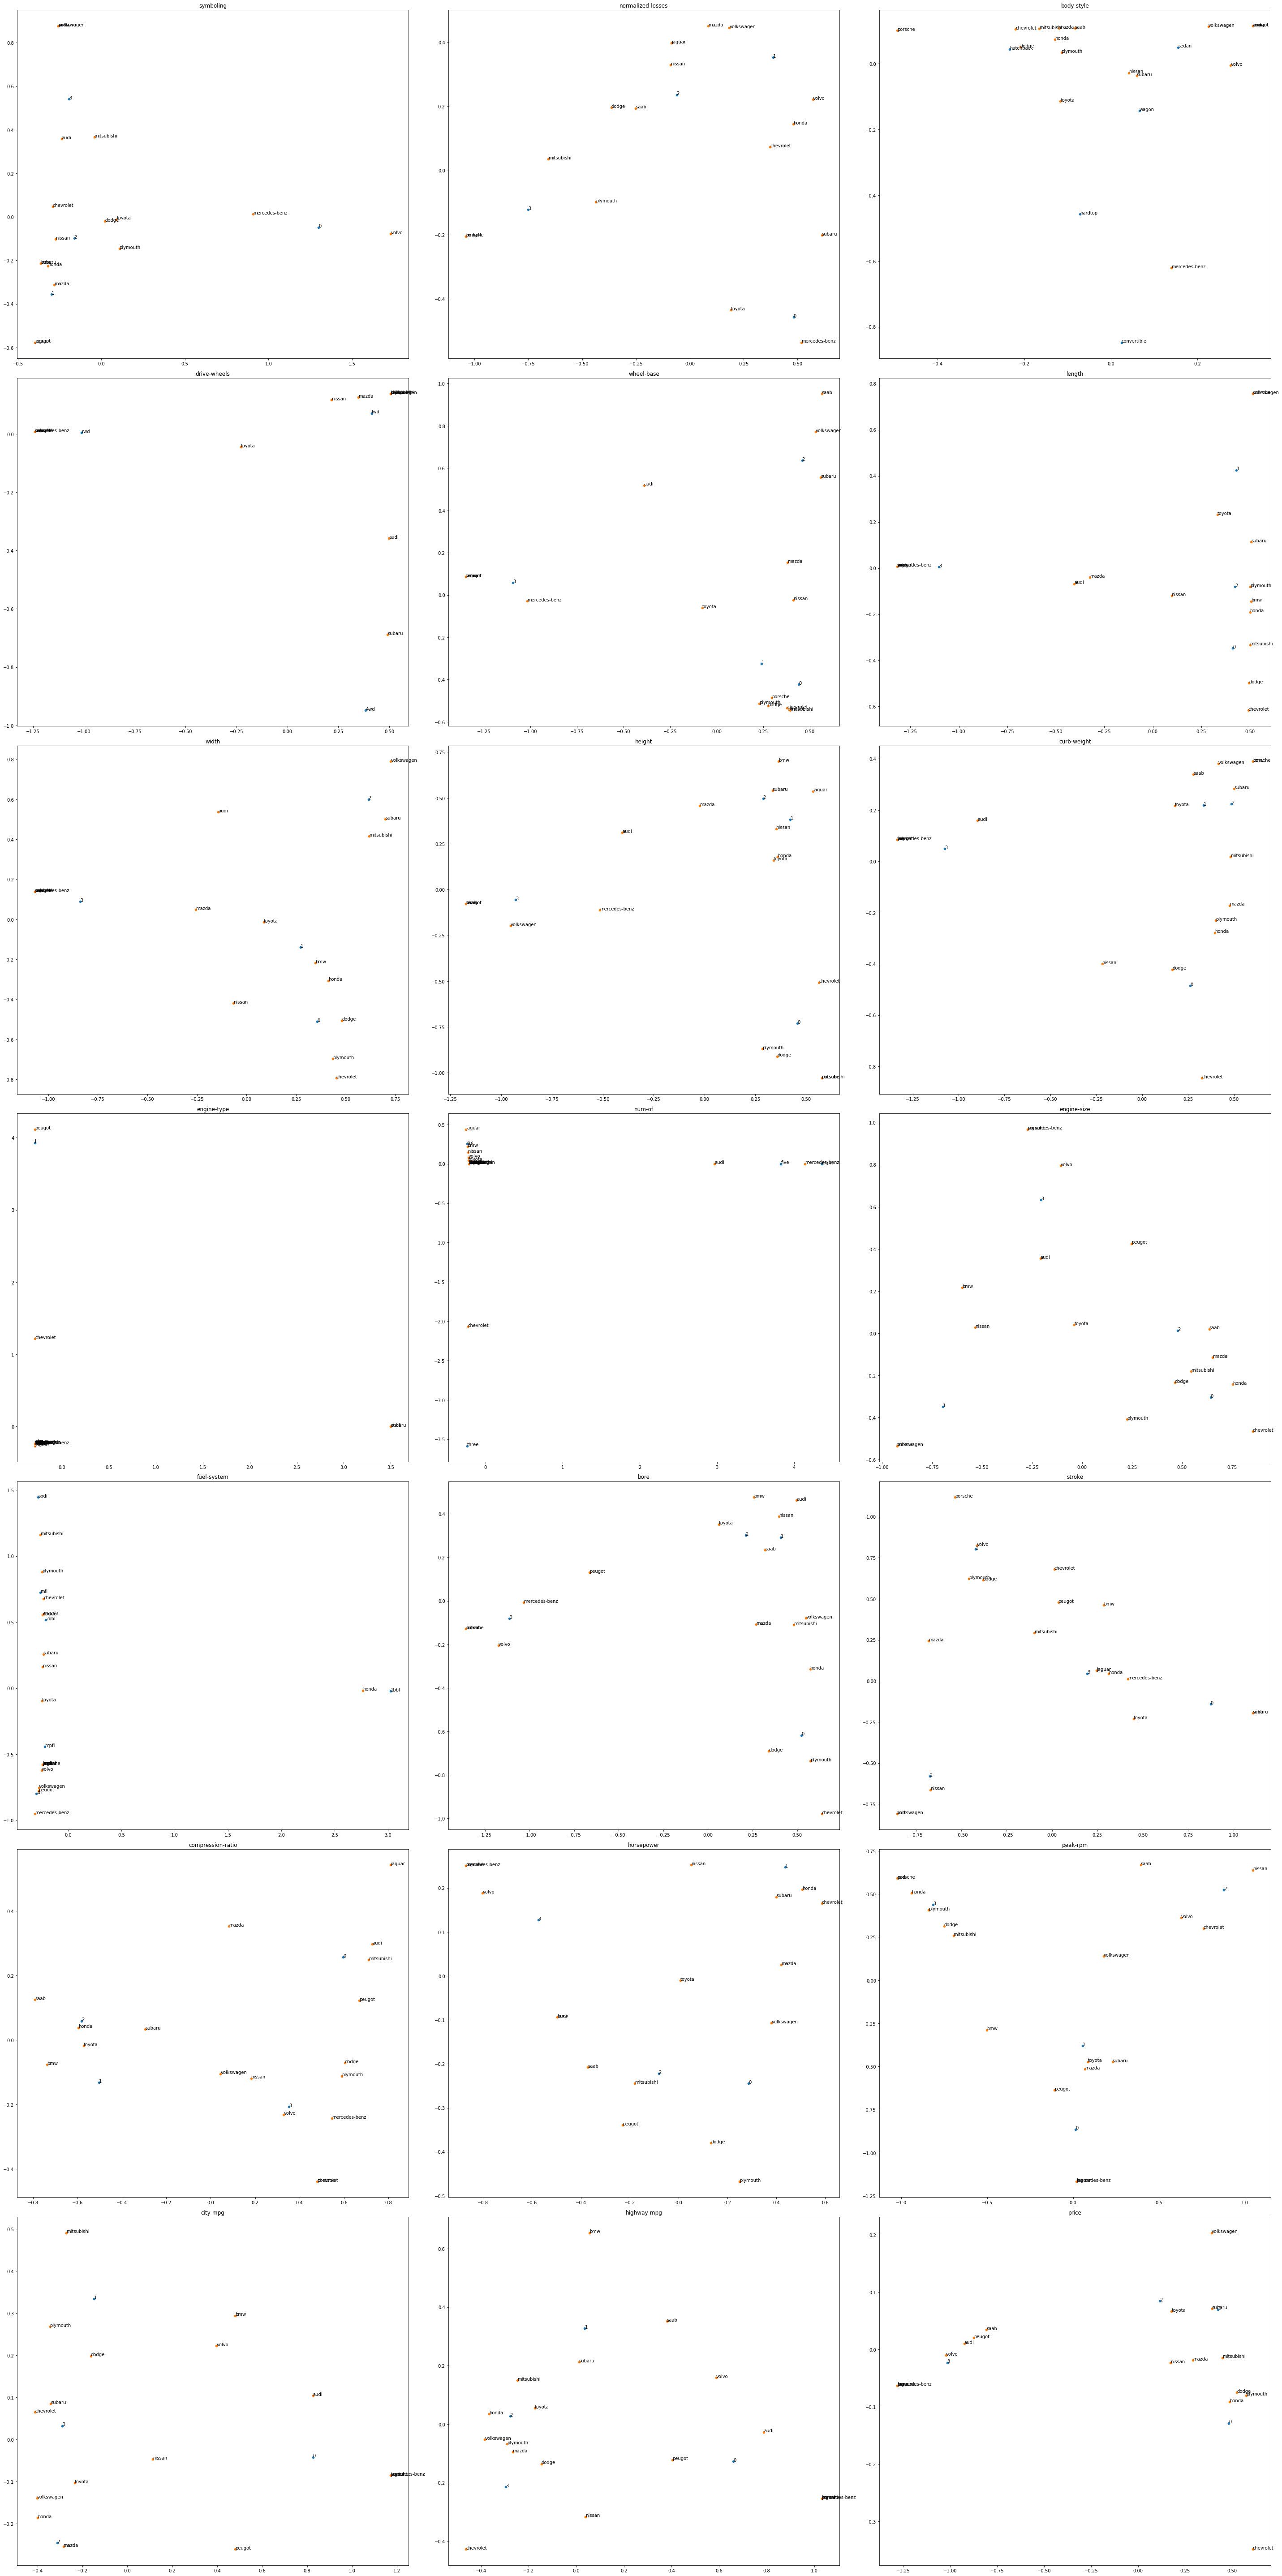

<Figure size 432x288 with 0 Axes>

In [21]:
i=7
j=len(key)//i
fig, axes = plt.subplots(nrows=i, ncols=j, figsize=(40, 80))

for n, ck in enumerate(key):

    ax=axes[n//j, n%j]
    df=cross_list[ck]

    ncol = df.shape[1]
    mca_counts = mca.MCA(df, ncols=ncol)

    rows = mca_counts.fs_r(N=2)
    cols = mca_counts.fs_c(N=2)

    ax.set_title(ck)
    if n <= len(key)-1 and rows.shape[1]!=1:
        sns.scatterplot(x=rows[:,0], y=rows[:,1], ax=ax)
        labels = df.index
        for label,x,y in zip(labels,rows[:,0],rows[:,1]):
            ax.text(x, y, label, fontsize=10)


        sns.scatterplot(x=cols[:,0], y=cols[:,1], ax=ax)
        labels = df.columns
        for label,x,y in zip(labels,cols[:,0],cols[:,1]):
            ax.text(x, y, label, fontsize=10)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('img.png')

各行間の$ \chi ^2 $距離。

- $ p_{i_{1} \cdot} $：$ i_1 $行目の行平均
- $ p_{i_{2} \cdot} $：$ i_2 $行目の行平均
- $ p_{j \cdot} $：$ j $列目の列平均
- $ c $：列数

$$ \chi^2 distance = \sqrt{\sum_{j=1}^{c} \frac{\Bigl( \frac{p_{i_{1}j}}{p_{i_{1} \cdot}} - \frac{p_{i_{2}j}}{p_{i_{2} \cdot}} \Bigr)^2}{p_{\cdot j}}} $$

同様に列についても各列間の$ \chi ^2 $距離が計算できる。  
（コレスポンディング分析のプロットに使われる距離の計算）